# Import libraries & check Dataframe

In [70]:
#Processing libraries
import pandas as pd
import numpy as np

#visualizing libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [71]:
train = pd.read_csv('train.csv')
train.head(2)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

#Preparation

In [73]:
#replace ?,unknown and error value with missing value(np.nan)
train.replace(to_replace=['Unknown','?',-999],value=np.nan,inplace=True)

#we ignore churn value of -1 because it will make bias prediction
df = train[train['churn_risk_score']!=-1]

#avg_frequency_login_days to float
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')

#joining_date to datetime 
df['joining_date']=pd.to_datetime(df['joining_date'],format='%Y-%m-%d')

df.head(2)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18.0,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
1,fffe43004900440032003100300035003700,Traci Peery,32.0,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   35829 non-null  object        
 1   Name                          35829 non-null  object        
 2   age                           35829 non-null  float64       
 3   gender                        35773 non-null  object        
 4   security_no                   35829 non-null  object        
 5   region_category               30566 non-null  object        
 6   membership_category           35829 non-null  object        
 7   joining_date                  35829 non-null  datetime64[ns]
 8   joined_through_referral       30537 non-null  object        
 9   referral_id                   35829 non-null  object        
 10  preferred_offer_types         35553 non-null  object        
 11  medium_of_operation         

#Explaratory Data Analyst (EDA)

##What is the proportion of customer churn risk score?

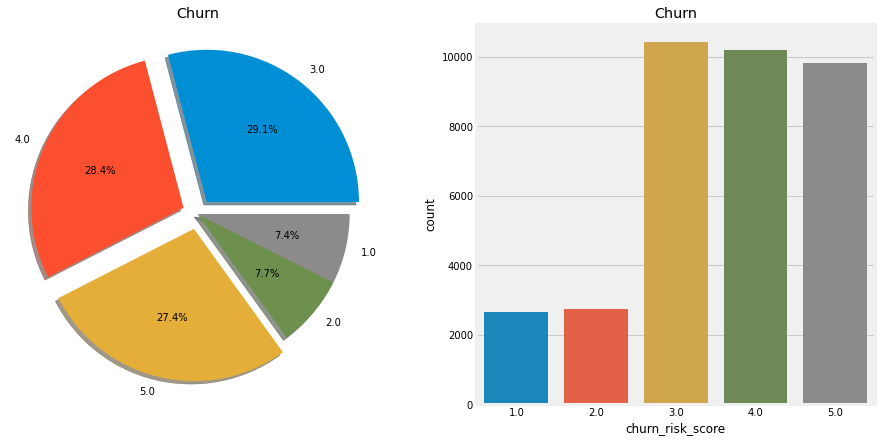

In [75]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

#axes[0]
df['churn_risk_score'].value_counts().plot.pie(explode = [0.1, 0.1,0.1,0,0], autopct = '%1.1f%%', ax = axes[0], shadow = True)
axes[0].set_title('Churn')
axes[0].set_ylabel('')

#axes[1]
sns.countplot('churn_risk_score', data = df, ax = axes[1])
axes[1].set_title('Churn')

plt.show()

* bar chart shows that the ratio of high churn rates (3, 4, 5) is more compare with low churn rates (1,2)
* This shows that many customers are dissatisfied with the product or service. This has a bad impact on the Business.
* What makes Churn rate high?

##Analysis Feature

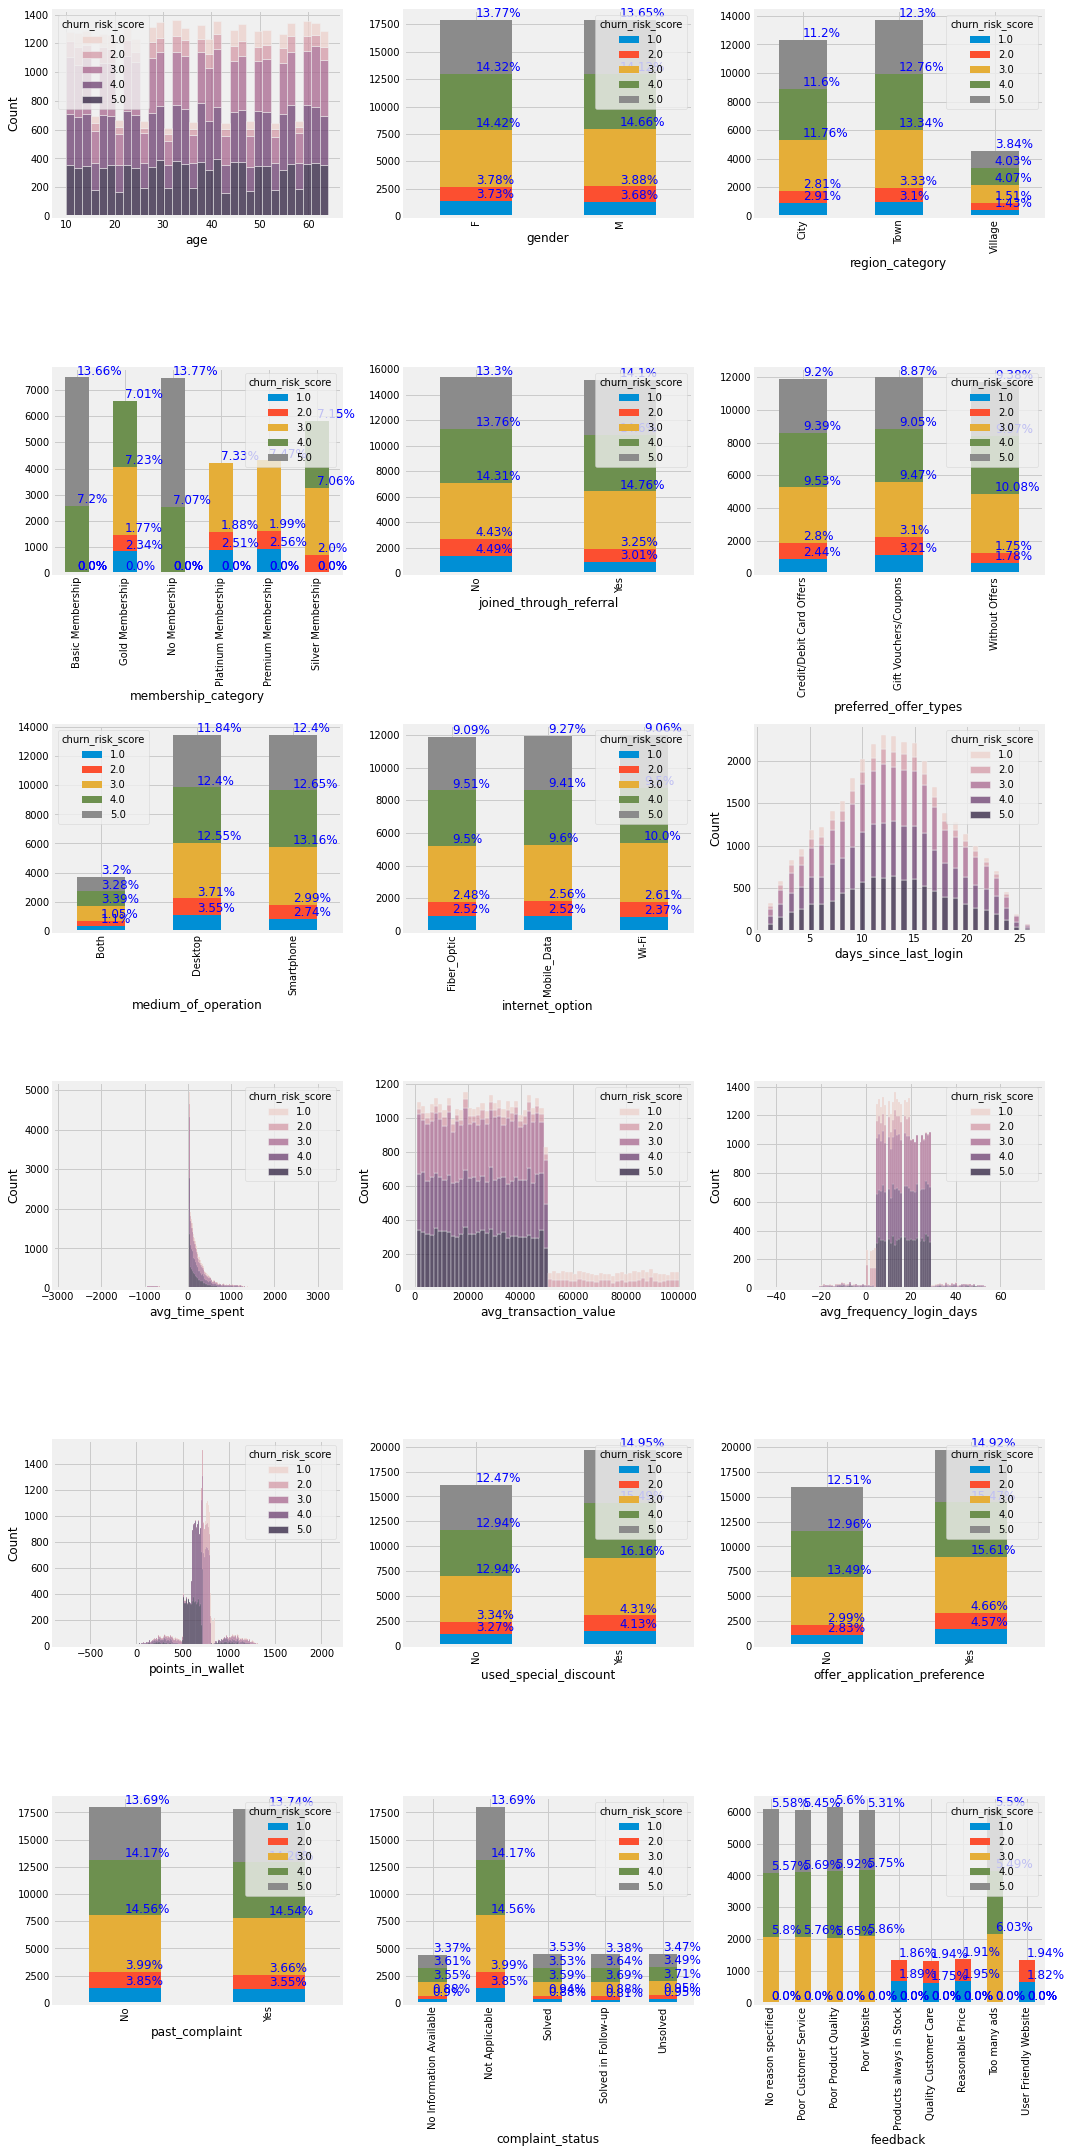

In [76]:
i = 0
j = 0
dropcol = ['customer_id','Name','security_no','referral_id','last_visit_time','joining_date','churn_risk_score']
fig, axes = plt.subplots(6, 3, figsize = (15, 30))
for col in df.columns :
  if col not in dropcol :
    if df[col].dtypes == 'object' :
      plot = df.groupby([col, 'churn_risk_score'])['customer_id'].count().unstack().plot(kind = 'bar', stacked = True, ax = axes[i,j])

      for bar in plot.patches:
        value = bar.get_height()
        persentase=round((value/df[col].count())*100,2)
        text=f"{persentase}%"
        textX=bar.get_x()+ bar.get_width()/2
        textY=bar.get_y() + value
        plot.text(textX, textY, text, ha='left', va='bottom', color='b', size=12)

    else :
      sns.histplot(data = df, x = col, hue = 'churn_risk_score', multiple = 'stack', ax = axes[i,j])
    
    if j == 2 :
      j = 0
      i += 1
    else :
      j += 1
plt.tight_layout()

**Past Complaint**
* Looking at the past_complain feature, the difference between those who complain and don't complain is 0.52%. A good business should have a bigger comparison difference, of course with a smaller proportion of customers who complain.


**Complaint Status**
* Looking in more detail in the complaint_status feature, there are still complaints that are ignored, judging from the proportion of no information available at 12.31%, remember that customers left because they felt that they were not cared for by the business, one of the causes of the high churn rate.

* No in past_complaint feature and Not applicable in complaint_status feature has same value. Yes in past_complaint Feature is sum of solved,solved in follow-up, unsolved, and no information available in complaint_status feature.Complaint_status is detailed information from past_complaint. We will drop one of these features, because it has the same information.


**Feedback**
* Order membership_category from lowest to highest
1. No Membership
2. Basic Membership
3. Silver Membership
4. Gold Membership
5. Premium Membership
6. Platinum Membership

* Bar chart shows that higher membership, higher churn rate is decreasing and the lower churn rate is increasing.This means that business services are getting lower for customers with low membership categories(no membership and basic membership)

* The bar chart shows that For customers with churn risk 1 and 2 provide positive feedback:
1. Products always in Stock
2. Quality Customer Care
3. Use Friendly Website
4. Reasonable Price
* Meanwhile, customers with churn risk 3,4 and 5 gave negative feedback:
1. Poor Website
2. Poor Product Quality
3. Poor Customer Service
4. Too many ads

* No Reason spesific its neutral feedback

##Multiple Feature

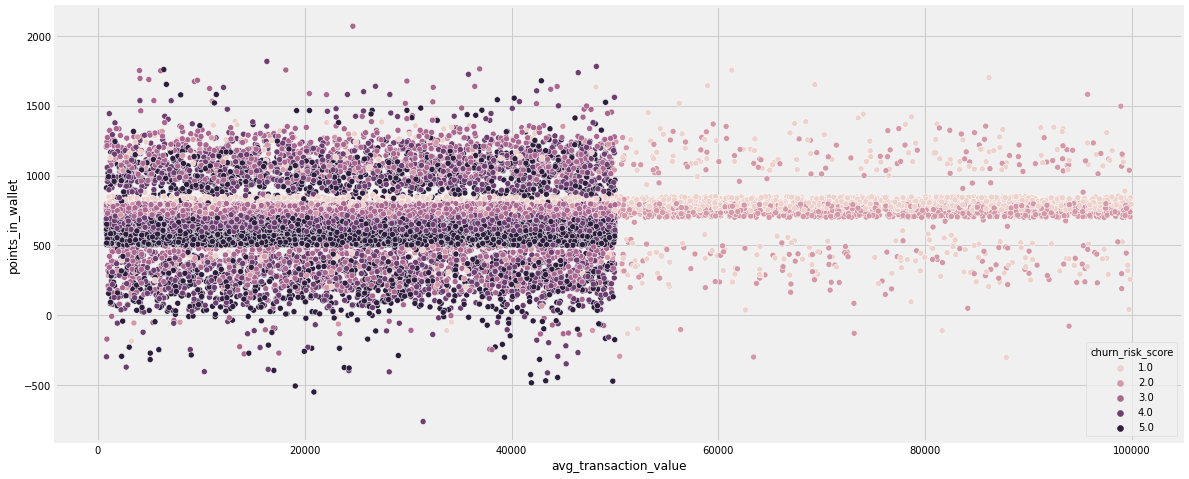

In [77]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='avg_transaction_value',y='points_in_wallet',hue='churn_risk_score', data=df)
plt.show()

* The scatterplot shows that the distribution of customers who have made transactions of more than 50000 have a low churn rate (1 and 2)

#Preprocessing to model

##Missing Value

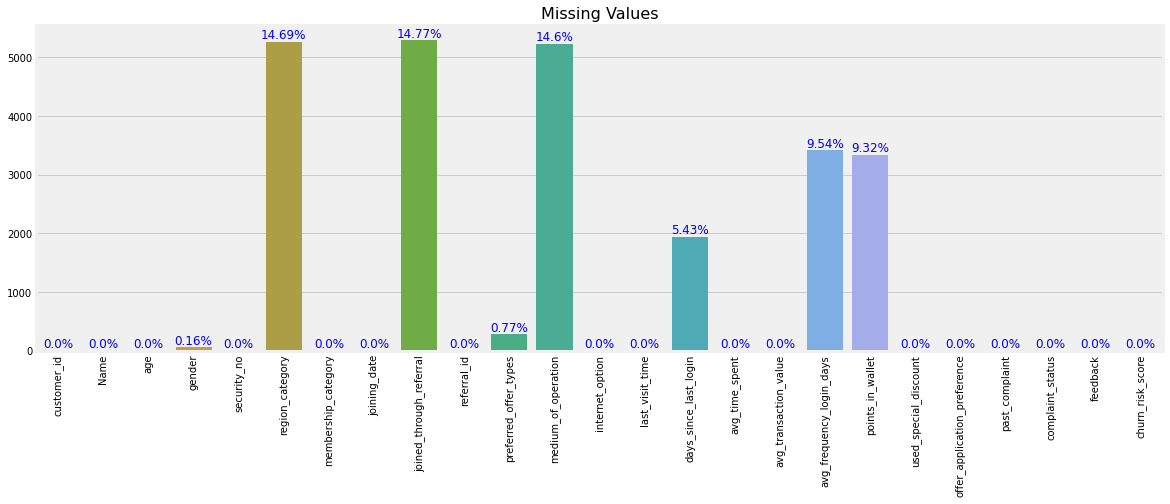

In [78]:
#checking missing value
plt.figure(figsize=(18,6))
g = sns.barplot(x=df.columns, y=df.isna().sum())
plt.xticks(rotation=90)
plt.title('Missing Values', size=16)
for bar in g.patches:
  value = bar.get_height()
  persentase= round((value/len(df))*100,2)

  text=f"{persentase}%"
  textX=bar.get_x()+ bar.get_width()/2
  textY=bar.get_y() + value

  g.text(textX, textY, text, ha='center', va='bottom', color='b', size=12)

plt.show()

In [79]:
#Handling Missing Value
#replace Mising Value in joined_through_referral from referral_id
df['joined_through_referral']=df['referral_id'].apply(lambda x:'No' if x=='xxxxxxxx' else 'Yes')

dfmissing = pd.Series(df.isna().sum().sort_values(ascending=False))
dfmissing = dfmissing[dfmissing != 0]

#replace Missing value numerical feature with median value and categorical feature with most value
for col in dfmissing.index:
  if df[col].dtype == 'object':             #categorical
    df[col] = df[col].fillna(df[col].mode()[0])
  else:                                     #mumerical
    df[col] = df[col].fillna(df[col].median())

##Outlier

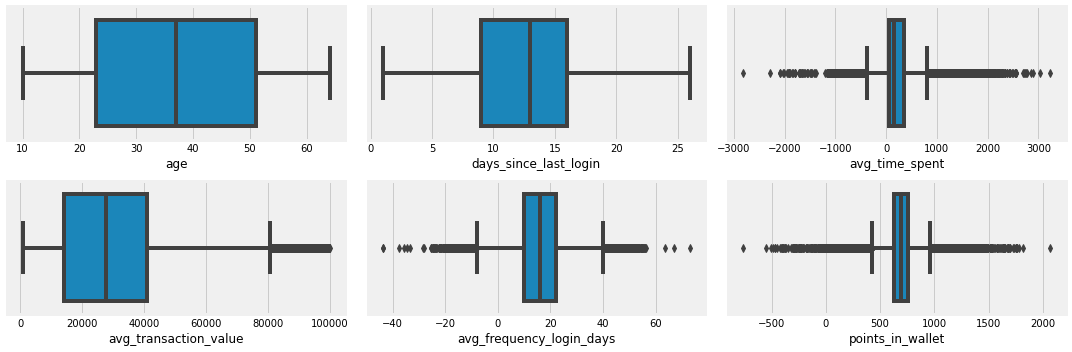

In [80]:
#Checking Outlier
i = 0
j=0
fig, axes = plt.subplots(2, 3, figsize = (15, 5))
for col in df.columns :
  if df[col].dtype=='float64':
    if col !='churn_risk_score':
      sns.boxplot(df[col], ax = axes[i,j])
      if j == 2 :
        j = 0
        i += 1
      else :
        j += 1
plt.tight_layout()

In [81]:
#Handling Outlier:
#replace the outlier value that is under the lower bound with lower bound value 
# and the outlier value that is top the upper bound with upper bound value
for col in df.columns :
  if df[col].dtype=='float64':
    if col !='churn_risk_score':
      q1=round(np.percentile(df[col],25),2)
      q3=round(np.percentile(df[col],75),2)
      iqr=q3-q1
      lb=q1-1.5*iqr
      ub=q3+1.5*iqr
      df.loc[df[col] < lb, col] = lb
      df.loc[df[col] > ub, col] = ub

##Converting and select features into suitable for modeling

In [82]:
#replace  negative value in feature 'avg frequency login days','avg time spent' to 0
for i in ['avg_frequency_login_days','avg_time_spent' ]:
    df.loc[df[i] < 0, i] = 0

#create fitur joined days from 16 Mar 2021 reduced days since last login then find the difference joining date
#16 Mar 2021 is the date dataset published in Hacker Earth
df['joined_days'] = df['joining_date'].apply(lambda x: int(str(pd.to_datetime('2021-03-16',format='%Y-%m-%d')-x).split()[0]))-df['days_since_last_login']

#classify age features
df['age']=df['age'].apply(lambda x: 'Adult' if x>21 else 'Teen')

#classify avg_transaction_value featur
df['avg_transaction_value']=df['avg_transaction_value'].apply(lambda x: 'High' if x>5000 else 'Low')

#label encoding membership_category feature
df['membership_category'] = df['membership_category'].map({'No Membership':0,
                                                           'Basic Membership':1,
                                                           'Silver Membership':2,
                                                           'Gold Membership':3,
                                                           'Premium Membership':4,
                                                           'Platinum Membership':5 })

#label encoding membership_category feature
df['feedback'] = df['feedback'].map({'Products always in Stock':1,
                                     'Quality Customer Care':1,
                                     'Poor Website':-1,
                                     'No reason specified':0,
                                     'Poor Product Quality':-1,
                                     'Poor Customer Service':-1, 
                                     'Too many ads':-1,
                                     'User Friendly Website':1,
                                     'Reasonable Price':1})

#onehot encoding other categorical feature
dfModel= pd.get_dummies(df, columns = ['age',
                                       'avg_transaction_value',
                                       'gender',
                                       'region_category',
                                       'internet_option',
                                       'medium_of_operation',
                                       'preferred_offer_types',
                                       'joined_through_referral',
                                       'used_special_discount',
                                       'offer_application_preference',
                                       'past_complaint'])



#medium_of_operation_Both this means costumer use desktop and smatphone so we replace 0 with 1
dfModel.loc[dfModel['medium_of_operation_Both'] == 1, ['medium_of_operation_Desktop','medium_of_operation_Smartphone']] = 1
#drop medium_of_operation_Both and preferred_offer_types_Without Offers feature
dfModel.drop(labels=['medium_of_operation_Both','preferred_offer_types_Without Offers'],axis=1,inplace=True)
dfModel

,customer_id,Name,security_no,membership_category,joining_date,referral_id,last_visit_time,days_since_last_login,avg_time_spent,avg_frequency_login_days,points_in_wallet,complaint_status,feedback,churn_risk_score,joined_days,age_Adult,age_Teen,avg_transaction_value_High,avg_transaction_value_Low,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,medium_of_operation_Desktop,medium_of_operation_Smartphone,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,joined_through_referral_No,joined_through_referral_Yes,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes
0,fffe4300490044003600300030003800,Pattie Morrisey,XW0DQ7H,5,2017-08-17,xxxxxxxx,16:08:02,17.0,300.63,17.0,781.75,Not Applicable,1,2.0,1290.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0
1,fffe43004900440032003100300035003700,Traci Peery,5K0N3X1,4,2017-08-28,CID21329,12:38:13,16.0,306.34,10.0,697.82,Solved,1,1.0,1280.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,1F2TCL3,0,2016-11-11,CID12313,22:53:21,14.0,516.16,22.0,500.69,Solved in Follow-up,-1,5.0,1572.0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
3,fffe43004900440036003000330031003600,Eufemia Cardwell,VJGJ33N,0,2016-10-29,CID3793,15:57:50,11.0,53.27,6.0,567.66,Unsolved,-1,5.0,1588.0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1
4,fffe43004900440031003900350030003600,Meghan Kosak,SVZXCWB,0,2017-09-12,xxxxxxxx,15:46:44,20.0,113.13,16.0,663.06,Solved,-1,5.0,1261.0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,6F51HFO,1,2017-09-21,xxxxxxxx,04:14:05,2.0,0.00,6.0,639.51,No Information Available,0,4.0,1270.0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1
36988,fffe43004900440033003500380036003600,Jenni Stronach,21KSM8Y,1,2016-06-27,xxxxxxxx,23:18:31,13.0,0.00,28.0,527.99,Not Applicable,-1,5.0,1710.0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0
36989,fffe4300490044003500330034003100,Luciana Kinch,XK1IM9H,1,2016-09-11,CID3838,03:50:25,12.0,154.94,16.0,680.47,Unsolved,-1,4.0,1635.0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
36990,fffe43004900440031003200390039003000,Tawana Ardoin,K6VTP1Z,5,2017-06-15,xxxxxxxx,09:50:03,15.0,482.61,20.0,425.14,Not Applicable,0,3.0,1355.0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0


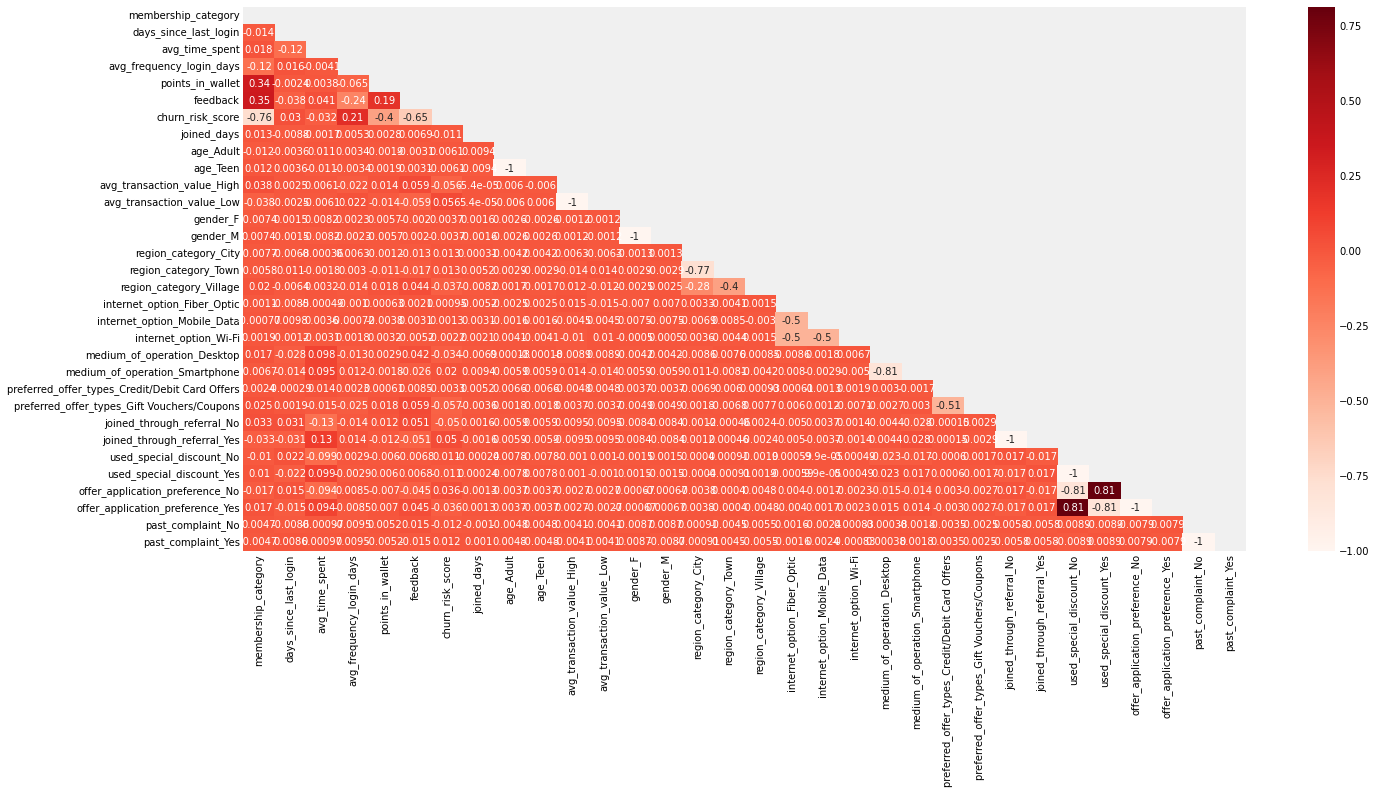

In [85]:
plt.figure(figsize = (20,10))
corr = dfModel.drop(labels = ['customer_id'], axis = 1).corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True, cmap = 'Reds')
plt.show()

In [88]:
dfModel.columns

Index(['membership_category', 'avg_time_spent', 'avg_frequency_login_days',
       'points_in_wallet', 'feedback', 'churn_risk_score', 'joined_days',
       'age_Adult', 'avg_transaction_value_Low', 'gender_M',
       'region_category_City', 'region_category_Town',
       'region_category_Village', 'internet_option_Fiber_Optic',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'joined_through_referral_Yes', 'used_special_discount_Yes',
       'offer_application_preference_Yes', 'past_complaint_Yes'],
      dtype='object')

In [87]:
#drop fiture      
dfModel.drop(labels=['referral_id','joining_date','days_since_last_login','complaint_status','customer_id','Name','security_no','last_visit_time','age_Teen','avg_transaction_value_High','gender_F','joined_through_referral_No','used_special_discount_No','offer_application_preference_No','past_complaint_No'],axis=1,inplace=True)

In [89]:
dfModel.head(2)

,membership_category,avg_time_spent,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score,joined_days,age_Adult,avg_transaction_value_Low,gender_M,region_category_City,region_category_Town,region_category_Village,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,medium_of_operation_Desktop,medium_of_operation_Smartphone,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,joined_through_referral_Yes,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes
0,5,300.63,17.0,781.75,1,2.0,1290.0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0
1,4,306.34,10.0,697.82,1,1.0,1280.0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1


##define X and Y

In [90]:
# define X and Y
X = dfModel.drop(columns = ['churn_risk_score'])
y = dfModel[['churn_risk_score']]

#scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

#split to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

#smote handlind imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Supervised Modeling

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

##KNN

Akurasi model KNN 67.12 %
Report Metrics KNN 
               precision    recall  f1-score   support

         1.0       0.53      0.71      0.60       530
         2.0       0.54      0.55      0.54       548
         3.0       0.84      0.79      0.82      2085
         4.0       0.60      0.45      0.52      2037
         5.0       0.65      0.80      0.72      1966

    accuracy                           0.67      7166
   macro avg       0.63      0.66      0.64      7166
weighted avg       0.67      0.67      0.67      7166

Confuction Matrix KNN 


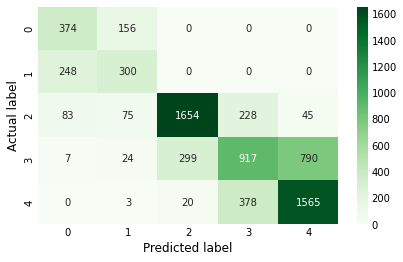

In [94]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=91)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
akurasiKNN = accuracy_score(y_test, y_pred)
print('Akurasi model KNN', "{:.2f}".format(akurasiKNN * 100),'%')
print(f"Report Metrics KNN \n {classification_report(y_test, y_pred)}")

print(f"Confuction Matrix KNN ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

##Dec Tree

Akurasi model Dec Tree 76.64 %
Report Metrics Decesion Tree 
               precision    recall  f1-score   support

         1.0       0.74      0.77      0.75       530
         2.0       0.77      0.74      0.76       548
         3.0       0.90      0.91      0.91      2085
         4.0       0.69      0.56      0.62      2037
         5.0       0.70      0.83      0.76      1966

    accuracy                           0.77      7166
   macro avg       0.76      0.76      0.76      7166
weighted avg       0.76      0.77      0.76      7166

Confuction Matrix Decesion Tree


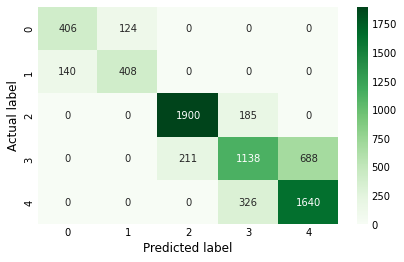

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=12)
dtree.fit(X_train, y_train)
y_predDT = dtree.predict(X_test)
akurasiDt = accuracy_score(y_test, y_predDT)
print('Akurasi model Dec Tree', "{:.2f}".format(akurasiDt * 100),'%')
pred = pd.DataFrame(y_predDT, columns=['predict'])
print(f"Report Metrics Decesion Tree \n {classification_report(y_test, y_predDT)}")

print(f"Confuction Matrix Decesion Tree")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predDT), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

##Random Forest

Akurasi model Random Forest 77.56 %
Report Metrics Random Forest 
               precision    recall  f1-score   support

         1.0       0.74      0.79      0.76       530
         2.0       0.78      0.74      0.76       548
         3.0       0.89      0.93      0.91      2085
         4.0       0.74      0.51      0.61      2037
         5.0       0.70      0.89      0.78      1966

    accuracy                           0.78      7166
   macro avg       0.77      0.77      0.76      7166
weighted avg       0.78      0.78      0.77      7166

Confuction Matrix Random Forest


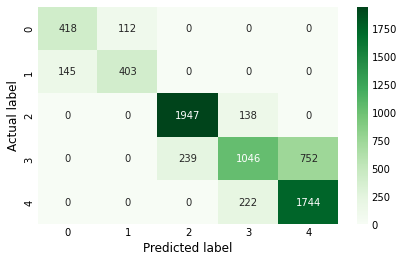

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 185) 
clf.fit(X_train, y_train)

y_predRF = clf.predict(X_test)
akurasiRF = accuracy_score(y_test, y_predRF)
print('Akurasi model Random Forest', "{:.2f}".format(akurasiRF * 100),'%')
pred = pd.DataFrame(y_predRF, columns=['predict'])
print(f"Report Metrics Random Forest \n {classification_report(y_test, y_predRF)}")

print(f"Confuction Matrix Random Forest")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predRF), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

##SVM

Akurasi model SVM 65.42 %
Report Metrics SVM 
               precision    recall  f1-score   support

         1.0       0.60      0.68      0.64       530
         2.0       0.65      0.56      0.60       548
         3.0       0.77      0.76      0.76      2085
         4.0       0.49      0.37      0.42      2037
         5.0       0.68      0.86      0.76      1966

    accuracy                           0.65      7166
   macro avg       0.64      0.65      0.64      7166
weighted avg       0.64      0.65      0.64      7166

Confuction Matrix SVM 


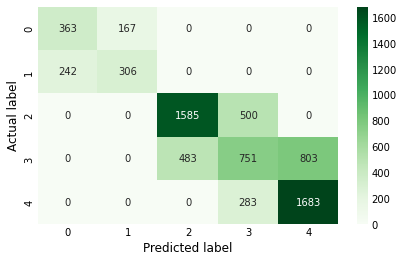

In [97]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_predict = model_svm.predict(X_test)
akurasiSVM = accuracy_score(y_test, y_predict)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(y_test, y_predict)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

##XGBOOST

Akurasi model xgb 77.25 %
Report Metrics xgb 
               precision    recall  f1-score   support

         1.0       0.74      0.76      0.75       530
         2.0       0.76      0.74      0.75       548
         3.0       0.91      0.91      0.91      2085
         4.0       0.69      0.61      0.65      2037
         5.0       0.73      0.81      0.76      1966

    accuracy                           0.77      7166
   macro avg       0.76      0.77      0.76      7166
weighted avg       0.77      0.77      0.77      7166

Confuction Matrix xgb 


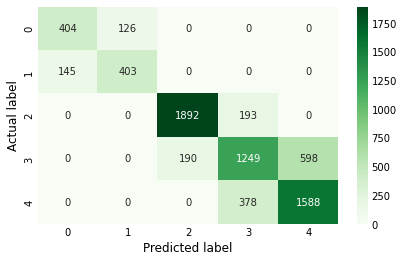

In [98]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,max_depth=10)
xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)
akurasixgb = accuracy_score(y_test, y_predxgb)
print('Akurasi model xgb', "{:.2f}".format(akurasixgb * 100),'%')
print(f"Report Metrics xgb \n {classification_report(y_test, y_predxgb)}")

print(f"Confuction Matrix xgb ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predxgb), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

##Logistic Regresion

Report Metrics Logistic Regression 
               precision    recall  f1-score   support

         1.0       0.61      0.65      0.63       530
         2.0       0.64      0.60      0.62       548
         3.0       0.76      0.76      0.76      2085
         4.0       0.48      0.46      0.47      2037
         5.0       0.71      0.74      0.72      1966

    accuracy                           0.65      7166
   macro avg       0.64      0.64      0.64      7166
weighted avg       0.65      0.65      0.65      7166

Confuction Matrix Logistik Regresion 


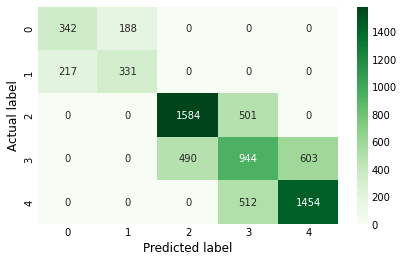

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predLR = lr.predict(X_test)
akurasilr = accuracy_score(y_test, predLR)
print(f"Report Metrics Logistic Regression \n {classification_report(y_test, predLR)}")

print(f"Confuction Matrix Logistik Regresion ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predLR), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

#conclussion

* Insights for business can improve service to customers without membership and basic membership to reduce churn rate in business
* for the model we recommend using Random forest  because based on the f1-score has the highest value compared to other models with a value of 78%. From the confession metric, the actual churn risk score '1' data is predicted with the model without being mistaken for a churn risk score of '3' ,'4', or '5', there is only an error to churn risk score '2' because the characteristics are almost the same, so it can be be accepted